# **App Success Prediction Project**

This project aims to develop a model to predict app success based on features such as category, install_count, and user ratings. By understanding the factors that drive app popularity, we can make data-informed recommendations to developers and marketers.


## Metric of Success
For this App Success Prediction project, the chosen metric of success is the macro F1-score. Given the nature of this multiclass classification task, the macro F1-score is ideal for evaluating performance across all categories equally, regardless of class imbalance.

Threshold for Success: A macro F1-score of 0.75 or higher.

Achieving this score reflects a well-balanced performance across all categories ("Very Low", "Low," "Medium," "High,") and provides reliable insights for stakeholders to make informed decisions based on the model's predictions.

This threshold was set based on the model's potential to offer actionable and consistent predictions, ensuring that each category is adequately represented in the evaluation.


## 1.**Data Exploration**

###1.1 Loading and Basic Information

In this section, we load the dataset and **display** the basic information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/data.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**Initial Overview**
- The dataset contains information on mobile apps, including categories, user ratings, and installation counts among others.
- Some columns may contain missing values, which we’ll handle in the next steps.
- The data types include both numeric and categorical variables, which will influence our preprocessing steps.


In [4]:
# Rename columns
df.rename(columns={
    'App': 'app_name',
    'Category': 'category',
    'Rating': 'rating',
    'Reviews': 'reviews_count',
    'Size': 'size',
    'Installs': 'install_count',
    'Type': 'app_type',
    'Price': 'price_usd',
    'Content Rating': 'content_rating',
    'Genres': 'genres',
    'Last Updated': 'last_updated',
    'Current Ver': 'current_version',
    'Android Ver': 'android_version'
}, inplace=True)


###1.2 Missing Values Analysis

In [5]:
# Percentages of missing values in each column
missing_values= df.isnull().sum()
missing_values= missing_values[missing_values>0].sort_values(ascending=False)

percent_missing= missing_values*100/len(df)
percent_missing= percent_missing[percent_missing>0].round(2)

missing_df= pd.DataFrame({'missing_values': missing_values, 'percent_missing': percent_missing})
missing_df



,missing_values,percent_missing
rating,1474,13.60
current_version,8,0.07
android_version,3,0.03
app_type,1,0.01
content_rating,1,0.01


**Insights**
- **rating**: Around 13.6% of the values in this column are missing.
- **current_version**, **android_version**, **app_type**, and **content_rating**: These columns have negligible missing values (under 0.1%).

In [6]:
# Median imputation for Rating
df.fillna({'rating': df['rating'].median()}, inplace=True)

# Mode imputation for other columns with minimal missing values
for column in ['current_version', 'android_version', 'app_type', 'content_rating']:
    df.fillna({column: df[column].mode()[0]}, inplace=True)

In [7]:
df.isnull().sum()

,0
app_name,0
category,0
rating,0
reviews_count,0
size,0
install_count,0
app_type,0
price_usd,0
content_rating,0
genres,0


To ensure the dataset is complete and usable for analysis, we applied the following imputation techniques:

- **rating**: Since this is a numeric and essential feature, we used median imputation to handle its missing values. This approach minimizes the impact of outliers and retains a central tendency reflective of the overall data.
- **current_version, android_version, app_type, and content_rating**: Given the low percentage of missing values in these categorical columns, we used mode imputation to replace the missing values with the most frequent category. This method preserves the original distribution of these features.

These steps prepare our data for exploration and modeling without compromising data integrity.


### 1.3 Converting datatypes
To improve processing efficiency, we adjusted data types in our dataset

In [8]:
df.dtypes

,0
app_name,object
category,object
rating,float64
reviews_count,object
size,object
install_count,object
app_type,object
price_usd,object
content_rating,object
genres,object


In [9]:
# Convert 'Reviews' to numeric, removing rows with missing values in 'Reviews'
df['reviews_count'] = pd.to_numeric(df['reviews_count'], errors='coerce')
df.dropna(subset=['reviews_count'], inplace=True)

# Clean 'install_count' column by removing symbols and converting to numeric, removing any resulting NaN values
df['install_count'] = pd.to_numeric(df['install_count'].str.replace('+', '').str.replace(',', ''), errors='coerce')
df.dropna(subset=['install_count'], inplace=True)

# Remove '$' in 'price_usd' and convert to float
df['price_usd'] = pd.to_numeric(df['price_usd'].str.replace('$', ''), errors='coerce')


In [10]:
# Function to convert size to MB
def convert_size(size):
    if size == 'Varies with device':
        return 'Varies'
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1000
    return None

# Apply the conversion function
df['size_MB'] = df['size'].apply(convert_size)

# Display the resulting DataFrame
df[['size', 'size_MB']]

,size,size_MB
0,19M,19.0
1,14M,14.0
2,8.7M,8.7
3,25M,25.0
4,2.8M,2.8
...,...,...
10836,53M,53.0
10837,3.6M,3.6
10838,9.5M,9.5
10839,Varies with device,Varies


- **reviews_count**: Converted to numeric, as it initially had string entries. Any rows where conversion resulted in NaN values were removed.
- **install_count**: Removed extraneous symbols (`+`, `,`) and converted to numeric type. We dropped any rows with missing values after conversion.
- **price_usd**: Removed the `$` symbol and converted the feature to a float type for accurate numeric operations.
- **size**: Converted size to 'MB', assuming 'M' represented megabytes and 'K' kilobytes.

These steps ensure that `reviews_count`, `install_count`,`price_usd`  and `size`are ready for analysis and visualization as numeric data.


###1.4 Unique Values

- Viewed unique values for each categorical feature, to reveal any inconsistencies or potential categories for encoding.

In [11]:
categorical_columns = ['category', 'app_type', 'content_rating']
for column in categorical_columns:
  unique_values = df[column].unique()
  print(f"Unique values in column '{column}'")
  print(unique_values)
  print()


Unique values in column 'category'
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']

Unique values in column 'app_type'
['Free' 'Paid']

Unique values in column 'content_rating'
['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']



**Insights:**

'category':The dataset contains a wide variety of app categories, indicating a diverse range of applications available in the market.

'app_type': The presence of "Free" and "Paid" indicates the monetization strategy of the apps.

'content_rating': The different content ratings suggest that the apps cater to various age groups, which can be a crucial factor for user demographics.

### 1.5 Duplicate Values

In [12]:
df.duplicated().sum()

483

In [13]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## **2. Exploratory Data Analysis**
In this step, we aim to uncover key insights about the data by exploring individual features (univariate analysis), relationships between two features (bivariate analysis), and interactions among three or more features (multivariate analysis). This will provide a solid foundation for understanding patterns that could help predict app success.

### 2.1 **Univariate Analysis**

We'll focus on understanding the distribution of each feature in isolation

#### 2.1.1 rating

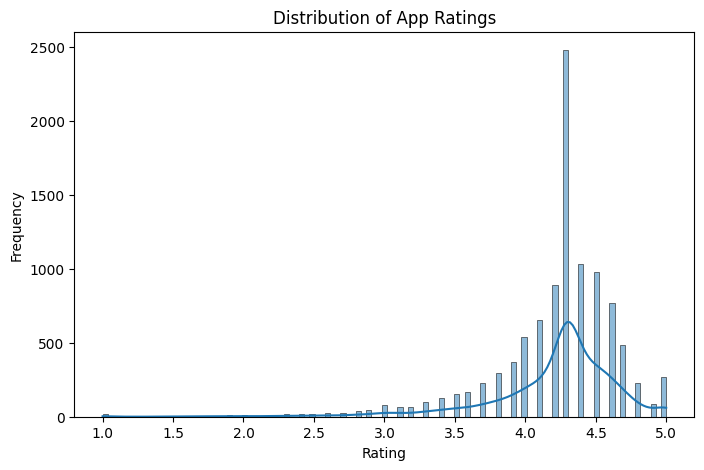

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


Most apps have high ratings, clustering around the median of 4.3, with relatively few apps rated below 4.0. This skew towards higher ratings may indicate a positive bias in user ratings or that app quality is generally high.

#### 2.1.2 Number of Installations

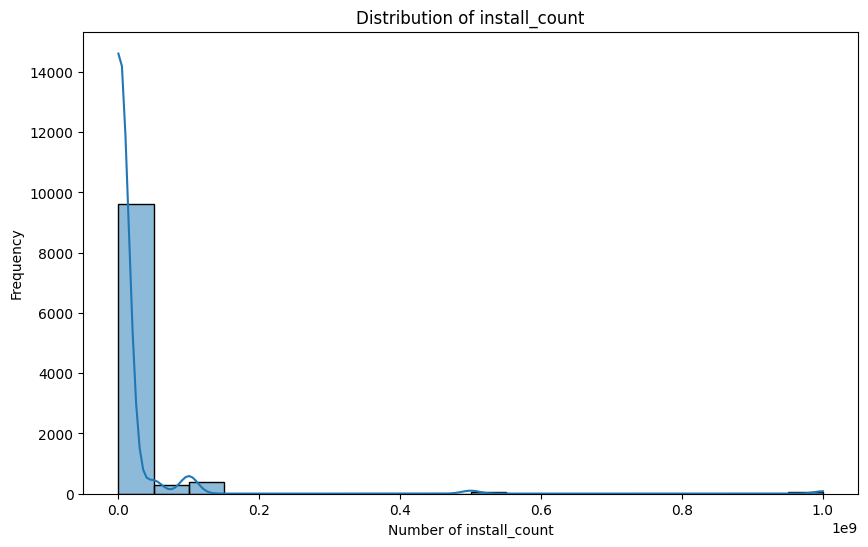

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['install_count'], bins=20, kde=True)
plt.title('Distribution of install_count')
plt.xlabel('Number of install_count')
plt.ylabel('Frequency')
plt.show()

The distribution of install_count is highly skewed to the right, indicating that while a significant number of apps have low install counts, there are a few outliers with very high install numbers.

#### 2.1.3 app_type

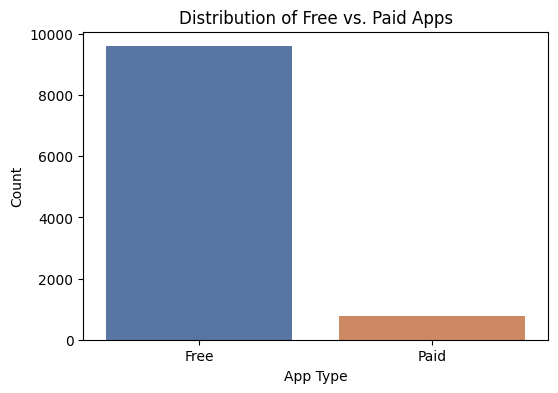

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='app_type', data=df, hue='app_type',palette='deep')
plt.title('Distribution of Free vs. Paid Apps')
plt.xlabel('App Type')
plt.ylabel('Count')
plt.show()


The majority of apps are free, which aligns with common app store trends. Paid apps, though fewer, could represent specialized or premium content.

#### 2.1.4 App Categories

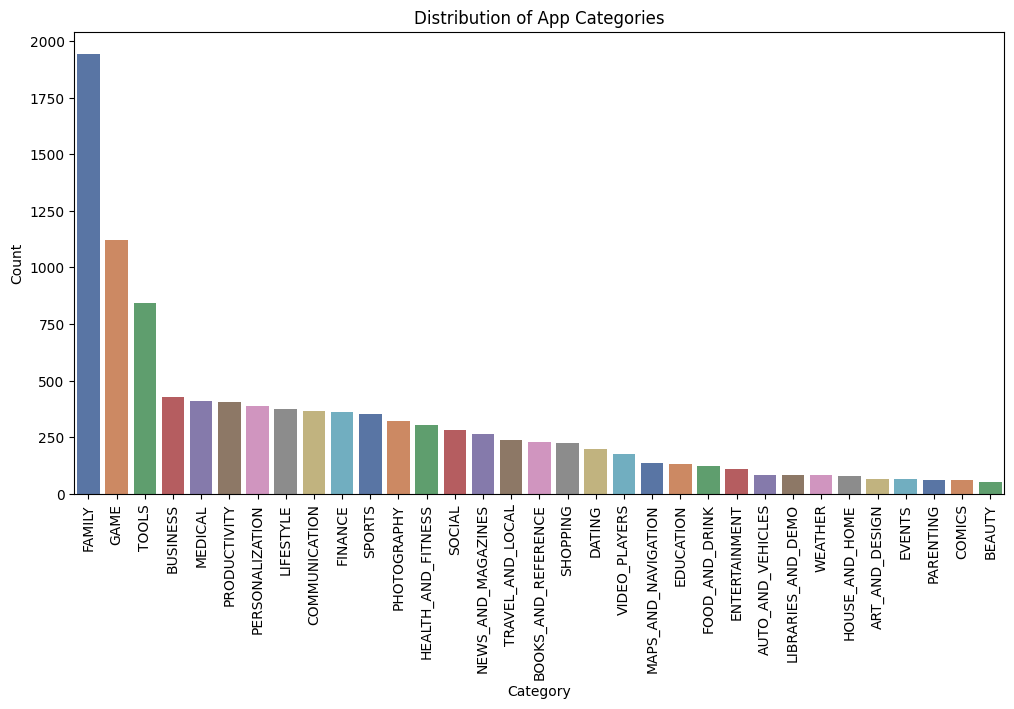

In [17]:
category_counts = df['category'].value_counts().sort_values(ascending=False)
# Create a bar plot
plt.figure(figsize=(12,6))
sns.barplot(x=category_counts.index, y=category_counts.values, hue=category_counts.index, palette='deep', legend=False)
plt.title('Distribution of App Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()



The bar plot of app counts by category reveals a varied distribution across categories, with FAMILY and GAME being the most prevalent, hosting 1,972 and 1,144 apps respectively, indicating high developer focus.

In contrast, categories like COMICS, BEAUTY, and PARENTING have far fewer apps, suggesting either niche markets or lower developer focus.

#### 2.1.5 content_rating(App Audience)

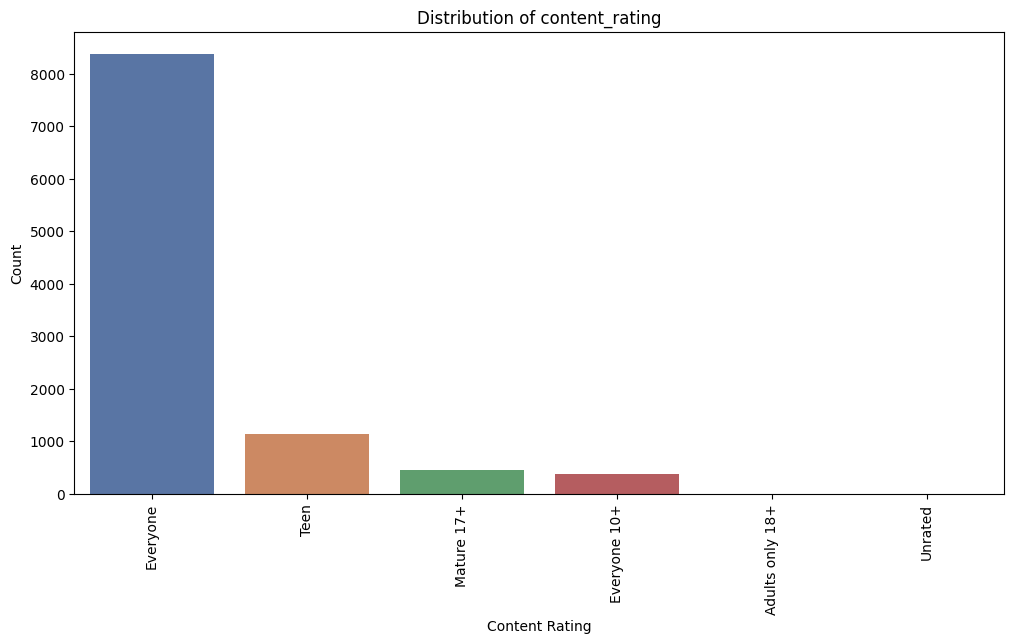

In [18]:
#Distribution of content_rating
cr_counts= df['content_rating'].value_counts().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12,6))
sns.barplot(x=cr_counts.index, y=cr_counts.values, hue=cr_counts.index, palette='deep', legend=False)
plt.title('Distribution of content_rating')
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

The distribution of content_rating shows that most apps target a general audience, with 8,714 rated Everyone, indicating a preference for broad accessibility. Teen (1,208) and Mature 17+ (499) apps are the next most common, catering to older audiences but still considerably fewer than Everyone. Ratings like Adults only 18+ (3) and Unrated (2) are rare, suggesting minimal focus on strictly adult content.

#### 2.1.6 price_usd

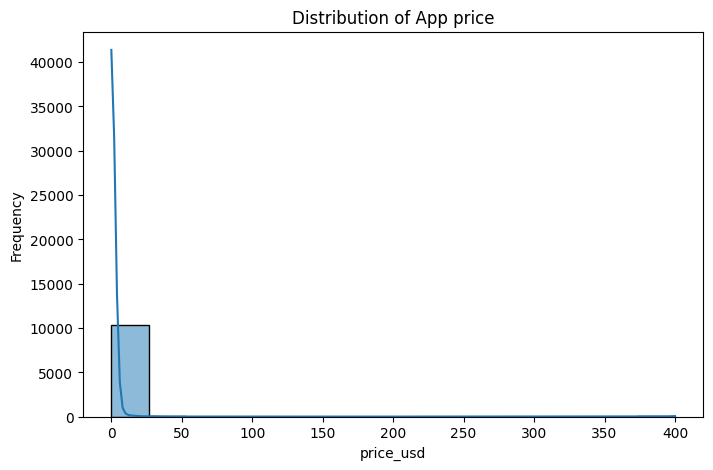

In [19]:
#Plot distribution of price
plt.figure(figsize=(8, 5))
sns.histplot(df['price_usd'], kde=True)
plt.title('Distribution of App price')
plt.xlabel('price_usd')
plt.ylabel('Frequency')
plt.show()

The histogram of Price reveals a highly skewed distribution with a significant number of free apps (indicated by a price of $0$). Most apps fall within the $0$ range, while a few have prices that extend up to $400, indicating a long tail.

This distribution highlights the predominance of free applications in the dataset, with a relatively small segment of expensive options.

#### 2.1.7 App Size


In [20]:
#Distribution of App sizes
size_counts= df['size_MB'].value_counts()
size_counts

,count
size_MB,
Varies,1526
11.0,188
13.0,186
12.0,186
14.0,182
...,...
0.43,1
0.429,1
0.2,1


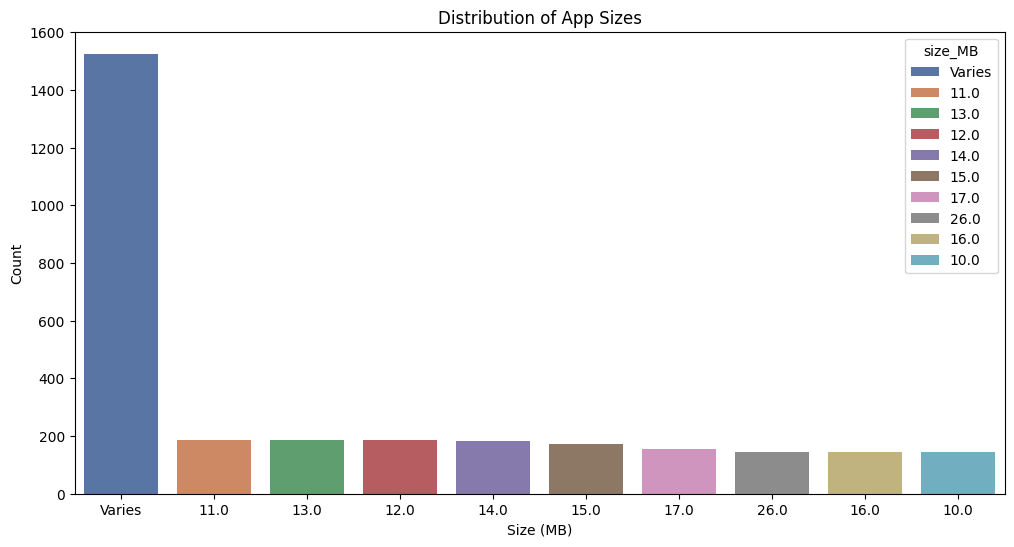

In [21]:
#filter to top 10 and plot
top_10_sizes = size_counts.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_sizes.index, y=top_10_sizes.values,hue=top_10_sizes.index, palette='deep')
plt.title('Distribution of App Sizes')
plt.xlabel('Size (MB)')
plt.ylabel('Count')
plt.show()

The size distribution shows a notable reliance on smaller app sizes, which could reflect user preferences for quick downloads and efficient performance. The dominance of "Varies" suggests that a significant number of apps are tailored to different devices, indicating flexibility in design. The range of fixed sizes also suggests that developers are optimizing app performance and user experience by adhering to commonly accepted size benchmarks, balancing features and resource demands.

### 2.2 **Bivariate Analysis**
In this section, we will explore relationships between two variables at a time to understand how they interact with install_count, our target variable. We will primarily focus on visualizations and statistical measures.

#### 2.2.1 Rating vs install_count

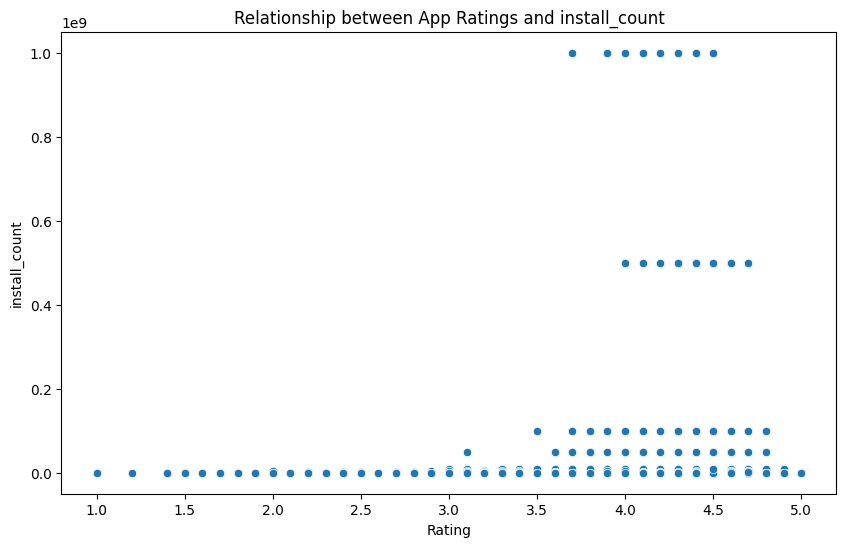

In [22]:
# Visualization: ScatterPlot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='install_count', data=df)
plt.title('Relationship between App Ratings and install_count')
plt.xlabel('Rating')
plt.ylabel('install_count')
plt.show()

The lack of a clear upward or downward trend suggests that other factors may influence the number of installs beyond just the app rating.

The clustering could indicate that many apps receive similar ratings, but their install counts vary due to external influences.

#### 2.2.2 price_usd vs install_count

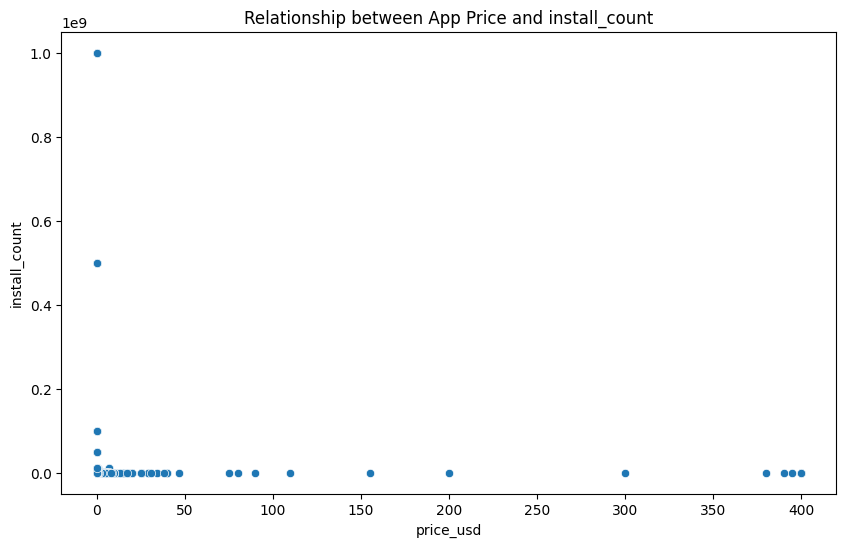

In [23]:
#Visualization: Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price_usd', y='install_count', data=df)
plt.title('Relationship between App Price and install_count')
plt.xlabel('price_usd')
plt.ylabel('install_count')
plt.show()

The L-shaped distribution in the scatter plot indicates a strong preference for free apps among users, with a relatively small market for paid applications. This insight can inform strategies for pricing, marketing, and potentially the development of features that add value to justify higher prices.

#### 2.2.3 app_type vs install_count

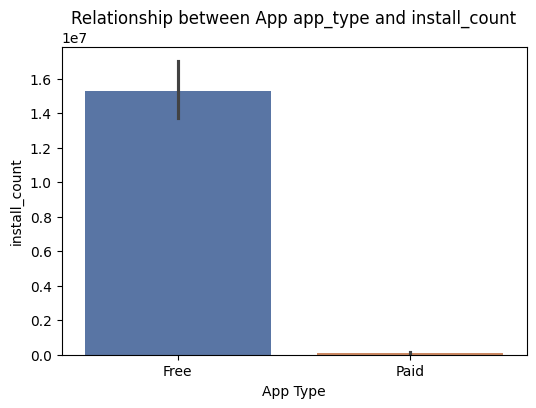

In [24]:
#Visualization: barplot
plt.figure(figsize=(6, 4))
sns.barplot(x='app_type', y='install_count', data=df, hue='app_type', palette='deep')
plt.title('Relationship between App app_type and install_count')
plt.xlabel('App Type')
plt.ylabel('install_count')
plt.show()

This distribution suggests that the app type plays a significant role in an app’s potential install count.

It reinforces the previous observation that, free apps tend to attract more users, while paid apps may require higher perceived value to achieve significant downloads.


#### 2.2.4 Category vs install_count

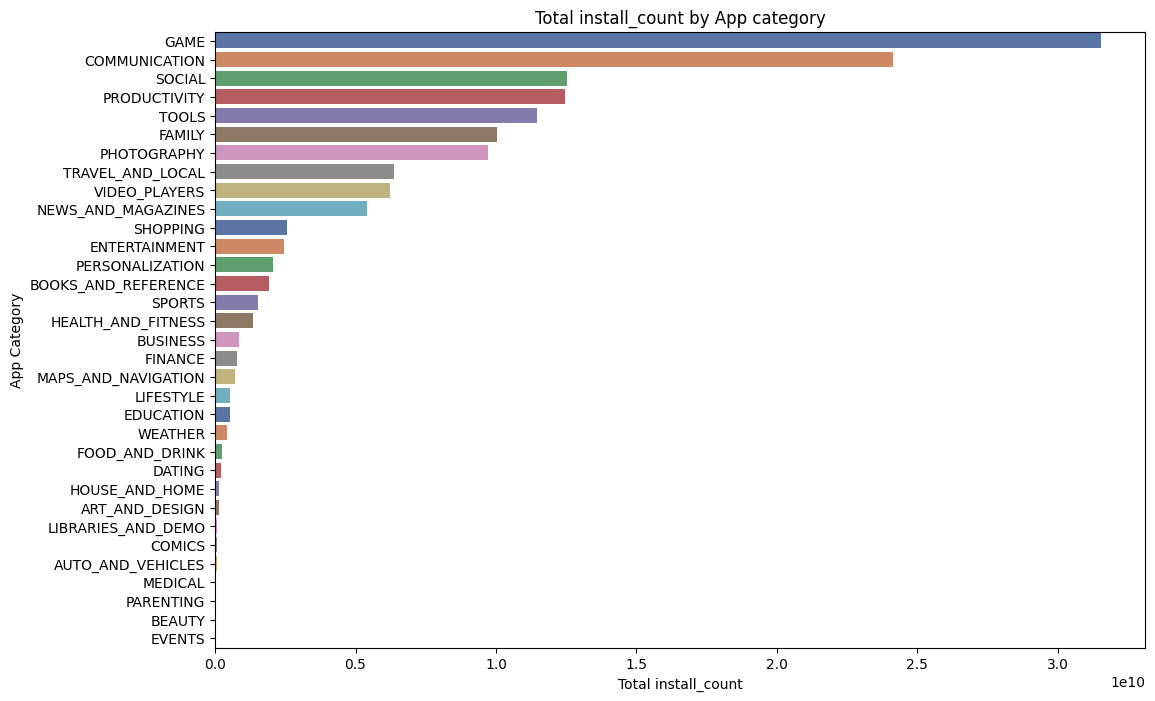

In [25]:
# Aggregating install_count by category
category_install_count = df.groupby('category')['install_count'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=category_install_count.values, y=category_install_count.index, hue=category_install_count.index, palette='deep')
plt.title('Total install_count by App category')
plt.xlabel('Total install_count')
plt.ylabel('App Category')
plt.show()

The distribution of install_count shows that Games and Communication apps dominate, with Productivity and Social apps also attracting high user engagement. Categories like Tools, Family, and Photography have moderate install_count, reflecting steady utility and informational demand. At the lower end, Events, Beauty, and Medical apps attract niche user interest, highlighting specialized appeal. This breakdown guides developers on which categories attract the most installs, informing app strategy for higher visibility and engagement.

#### 2.2.5 content_rating vs install_count

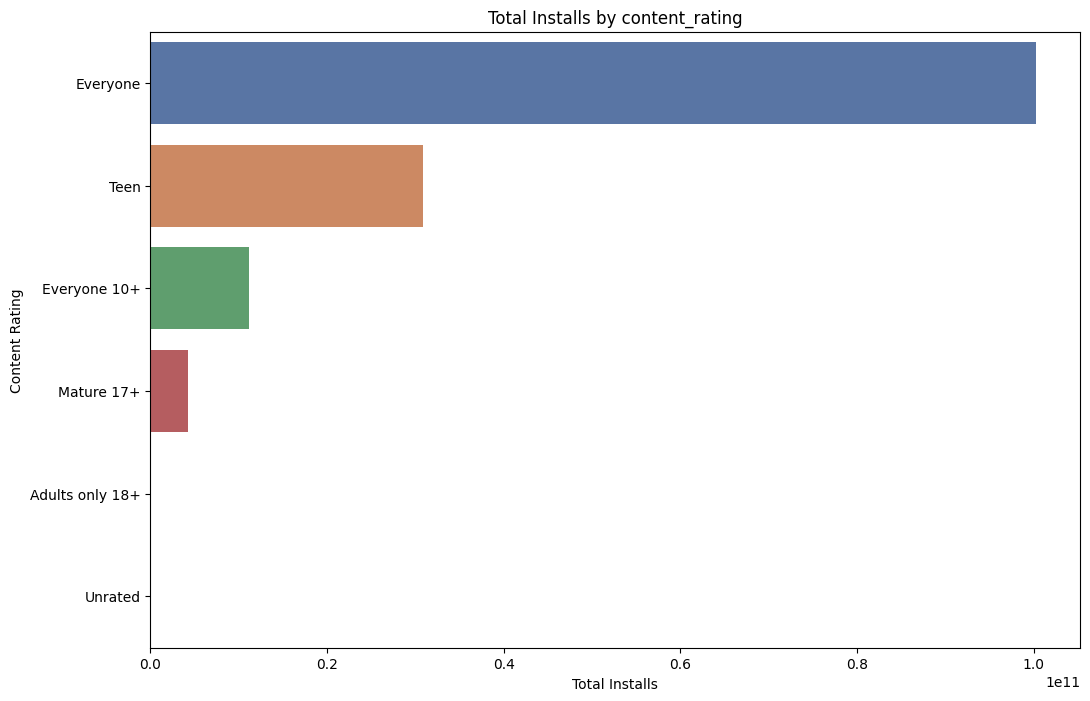

In [26]:
# Aggregating installs by Content Ratting
content_rating_installs = df.groupby('content_rating')['install_count'].sum().sort_values(ascending=False)

#plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=content_rating_installs.values, y=content_rating_installs.index, hue=content_rating_installs.index, palette='deep')
plt.title('Total Installs by content_rating')
plt.xlabel('Total Installs')
plt.ylabel('Content Rating')
plt.show()


Apps rated Everyone have the highest install_count, showing broad appeal and accessibility across all age groups, followed by Teen and Everyone 10+ rated apps, which also draw significant installs.

Mature 17+ apps attract a smaller yet notable user base, appealing to a more selective audience.

Adults only 18+ and Unrated apps have minimal installs, indicating limited engagement, likely due to restricted age suitability or undefined content_rating.

This distribution emphasizes the importance of age-appropriate ratings for maximizing app reach and installs.

### 2.3 **Multivariate Analysis**
Multivariate analysis helps explore interactions between multiple features, providing a deeper understanding of complex relationships in the dataset.

#### 2.3.1 install_count vs Category vs app_type

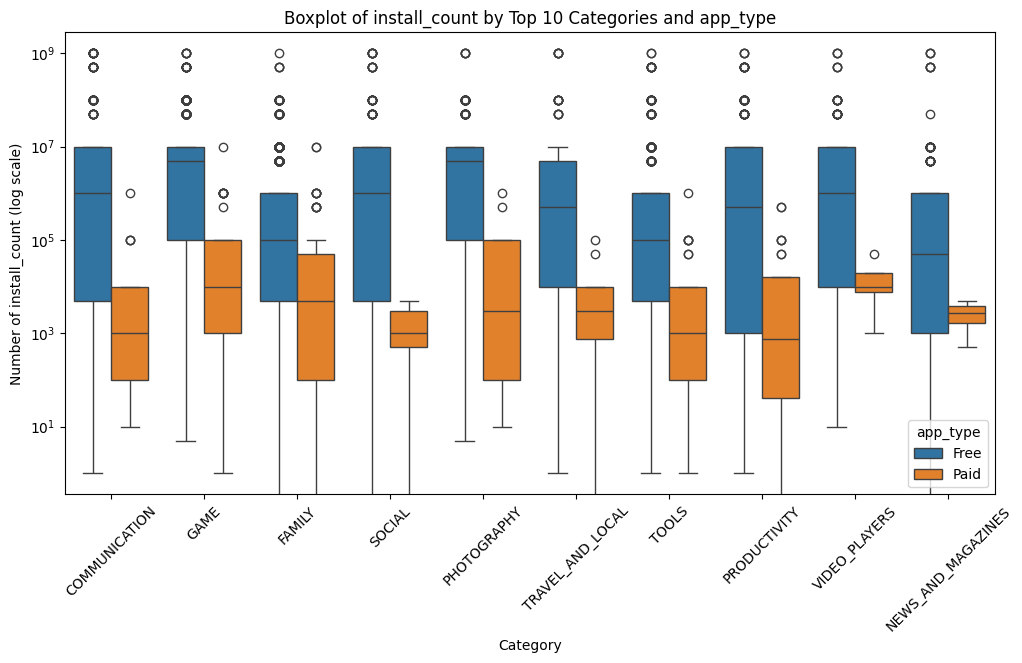

In [27]:
# Group by 'Category' and 'app_type' to get the top 10 categories by total installs
top_categories = df.groupby('category')['install_count'].sum().nlargest(10).index
filtered_df = df[df['category'].isin(top_categories)]

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='category', y='install_count', hue='app_type')
plt.title('Boxplot of install_count by Top 10 Categories and app_type')
plt.xticks(rotation=45)
plt.yscale('log')  # Using log scale for better visibility
plt.xlabel('Category')
plt.ylabel('Number of install_count (log scale)')
plt.legend(title='app_type')
plt.show()

The boxplot of install_count by the top 10 categories and type reveals significant variability in app popularity across categories. The Communication category leads in median installs, with a wide interquartile range indicating diverse performance. Family and Game categories also show substantial installs, while Tools, Travel and Local, and Video Players have lower median counts. Free apps generally attract more installs than Paid apps, highlighting a competitive landscape where a few top performers skew the distribution upward.

#### 2.3.2 install_count by content_rating and app_type

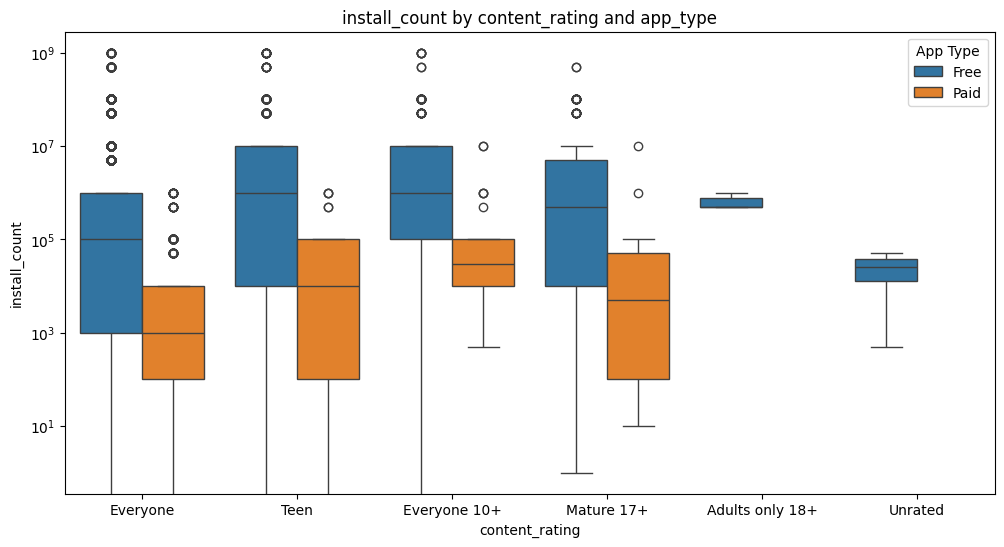

In [28]:
# Boxplot of install_count by content_rating and app_type
plt.figure(figsize=(12, 6))
sns.boxplot(x='content_rating', y='install_count', hue='app_type', data=df)
plt.yscale('log')
plt.title('install_count by content_rating and app_type')
plt.xlabel('content_rating')
plt.ylabel('install_count')
plt.legend(title='App Type')
plt.show()


The boxplot of install_count by content_rating and type reveals that apps rated "Everyone" significantly outperform others in total installs, with a substantial median and wide interquartile range, indicating diverse performance.

In contrast, "Teen" and "Mature 17+" ratings show lower median installs, with the "Adults only 18+" category having the fewest installs, highlighting a limited audience.

 Free apps across all content_ratings dominate in installs compared to their paid counterparts, reinforcing the trend observed in other analyses.

## **3. Data Preprocessing**

### 3.1 **Feature Engineering**
In this section, we created new features,where:

`min_android_version`: Extracts the minimum Android version to provide more meaningful information than the string "4.4 and up".

`size_category`: Groups app sizes into categories to be inclusive of the "varies with device" option and make them easier to process.

`install_category`: Bins install_count into categories (e.g., Very Low, Low, Medium, High) to reduce the impact of outliers and for better classification of app success.

#### 3.1.1 Extracting Minimum Android Version

In [29]:
df['android_version'].value_counts().head(5)

,count
android_version,
4.1 and up,2381
4.0.3 and up,1451
4.0 and up,1337
Varies with device,1221
4.4 and up,894


In [30]:
import re
def extract_min_android_version(version):
    # Check if the entry is "Varies with device"
    if version == 'Varies with device':
        return 0  # Assign a specific value to represent this category
    # Extract the minimum version using regex
    match = re.match(r'(\d+\.\d+)', version)
    if match:
        return float(match.group(1))  # Convert to float for numerical operations
    return None  # Fallback for unexpected formats

# Apply extraction
df['min_android_version'] = df['android_version'].apply(extract_min_android_version)


df[['android_version', 'min_android_version']].head()

,android_version,min_android_version
0,4.0.3 and up,4.0
1,4.0.3 and up,4.0
2,4.0.3 and up,4.0
3,4.2 and up,4.2
4,4.4 and up,4.4


In [31]:
df['min_android_version'].value_counts().head(5)

,count
min_android_version,
4.0,2790
4.1,2382
0.0,1221
2.3,922
4.4,905


- Android 4.0 and 4.1 are the most common minimum versions, with 2878 and 2454 apps, respectively.

- Version 0.0 represents "Varies with device," totaling 1362 apps where the required version depends on the device specifications.

- Lower Android versions (like 2.3 and 2.2) still appear, indicating compatibility with older devices, while newer versions like 7.0 and 8.0 have fewer apps, suggesting lower support for recent Android releases in the dataset.

This distribution highlights app compatibility across various Android versions, from legacy (1.0) to modern releases, with a notable concentration around version 4.x.

In [32]:
df['min_android_version'].unique()

array([4. , 4.2, 4.4, 2.3, 3. , 4.1, 0. , 2.2, 5. , 6. , 1.6, 1.5, 2.1,
       7. , 5.1, 4.3, 2. , 3.2, 7.1, 8. , 3.1, 1. ])

#### 3.1.2 Categorizing Size

In [33]:
# Group size into 4 categories inclusive of "varies"
def categorize_size(size):
    if size == 'Varies':
        return 'Varies'
    elif size <= 10:
        return 'Small'
    elif size <= 50:
        return 'Medium'
    elif size <= 200:
        return 'Large'
    else:
        return 'Very Large'

# Apply the function to create the 'size_category' column
df['size_category'] = df['size_MB'].apply(categorize_size)
df[['size_MB', 'size_category']].head()

,size_MB,size_category
0,19.0,Medium
1,14.0,Medium
2,8.7,Small
3,25.0,Medium
4,2.8,Small


In [34]:
df['size_category'].value_counts()

,count
size_category,
Small,3995
Medium,3812
Varies,1526
Large,1024


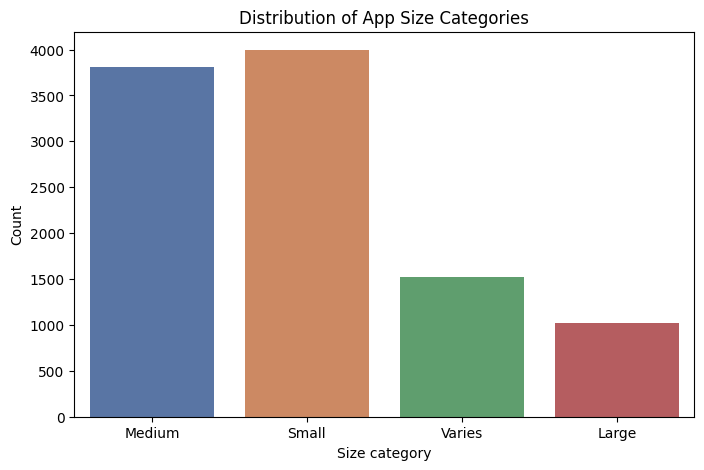

In [35]:
#plot of size_category distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='size_category', data=df, hue='size_category', palette='deep')
plt.title('Distribution of App Size Categories')
plt.xlabel('Size category')
plt.ylabel('Count')
plt.show()

The size_category column classifies app sizes into four categories:

- Small (≤10 MB): Contains 4060 apps, representing lightweight apps.

- Medium (10–50 MB): Includes 4011 apps, covering moderate-size apps.

- Large (50–200 MB): Encompasses 1074 apps, indicating apps with larger file sizes.

- Varies: Represents 1695 apps where size depends on the device, maintaining the original "Varies" classification.

This categorization provides a clear view of app size distribution, making it easier to analyze and compare app sizes across standardized groups.

#### 3.1.3 Binning install_count

In [36]:
#Binning install_count into four categories(very low, low, moderate, high) by custom binning
bins = [0, 1000, 10000, 100000, float('inf')]
install_categories = ['Very Low', 'Low', 'Medium', 'High']

# Apply binning
df['install_category'] = pd.cut(df['install_count'], bins=bins, labels=install_categories, right=False)

In [37]:
df['install_category'].value_counts()

,count
install_category,
High,5700
Very Low,1791
Medium,1507
Low,1359


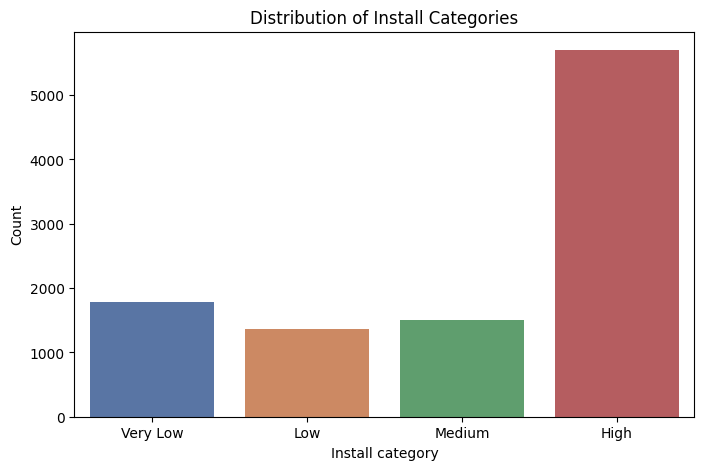

In [38]:
#plot distribution of the categories
plt.figure(figsize=(8, 5))
sns.countplot(x='install_category', data=df, hue='install_category', palette='deep')
plt.title('Distribution of Install Categories')
plt.xlabel('Install category')
plt.ylabel('Count')
plt.show()

In this step, the install_count feature has been binned into four categories ( Very Low, Low, Medium, and High) .

The "install_category" column was created by dividing the install counts into four frequency groups based on the distribution of the data.
- High (100,000+ installs):

This bin includes all apps with 100,000 or more installs.
- Medium (10,000 - 99,999 installs):

This bin includes apps with installs ranging from 10,000 to 99,999.
- Low (1,000 - 9,999 installs):

This bin includes apps with installs ranging from 1,000 to 9,999.
- Very Low (0 - 999 installs):

This bin includes apps with fewer than 1,000 installs.

This categorization provides an easy way to interpret the popularity of an app in terms of install count, helping to simplify analysis and comparisons.

#### 3.1.4 Drop unnecessary columns
- App:

The app name does not add predictive power regarding install success, as it is not directly related to any trend or measurable characteristic.

Dropping reduces unnecessary dimensionality without loss of predictive insights
- last_updated:

This column could be useful for tracking the frequency of updates, which might influence app popularity. However, it lacks detailed timestamps needed for calculating meaningful update patterns.

With detailed timestamps, update frequency could be engineered, but without them, it’s best to drop.
- current_version:

On its own, current_version is not informative about app performance. While versioning could provide insights if paired with timestamps (e.g., change rate), it doesn’t offer value alone.

Dropping this avoids noise since timestamps for tracking version changes are unavailable.
- genres:

Genre information is often redundant when a broader category (e.g., category) is available. Using both could add unnecessary noise due to high cardinality.

The category column is more general and captures similar insights.
- size, size_MB and install_count

Since size_category and install_category have been created to represent size and installs effectively, these columns become redundant.

Used size_category  and install_category as concise and informative features.
- rating and reviews_count

The features rating and reviews_count reflect an app's post-launch performance, relying on user feedback after release. Since we aim to predict app success before launch, we exclude these features to avoid data leakage and focus only on pre-launch characteristics.

In [39]:
df.drop(['app_name', 'last_updated', 'current_version', 'genres', 'size', 'android_version', 'size_MB', 'rating', 'reviews_count', 'install_count' ], axis=1, inplace=True)
df.head()

,category,app_type,price_usd,content_rating,min_android_version,size_category,install_category
0,ART_AND_DESIGN,Free,0.0,Everyone,4.0,Medium,Medium
1,ART_AND_DESIGN,Free,0.0,Everyone,4.0,Medium,High
2,ART_AND_DESIGN,Free,0.0,Everyone,4.0,Small,High
3,ART_AND_DESIGN,Free,0.0,Teen,4.2,Medium,High
4,ART_AND_DESIGN,Free,0.0,Everyone,4.4,Small,High


### 3.2 **Feature Encoding**
In this step, we'll encode categorical features, converting them into a format interpretable by algorithms.

In [40]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from google.colab import files
from sklearn.base import BaseEstimator, TransformerMixin

In [41]:
#Encode categorical columns individually
categorical_columns = ['category', 'app_type', 'content_rating', 'size_category']

feature_encoders = {}
for column in categorical_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    feature_encoders[column] = label_encoder
df.head()

,category,app_type,price_usd,content_rating,min_android_version,size_category,install_category
0,0,0,0.0,1,4.0,1,Medium
1,0,0,0.0,1,4.0,1,High
2,0,0,0.0,1,4.0,2,High
3,0,0,0.0,4,4.2,1,High
4,0,0,0.0,1,4.4,2,High


In [42]:
import joblib
#saving the encoders
for column, encoder in feature_encoders.items():
    encoder_filename = f'{column}_encoder.joblib'
    joblib.dump(encoder, encoder_filename)


## **4. Modelling**
The modeling phase involves building predictive models to classify the success of mobile applications based on various features. This phase utilizes machine learning techniques to develop models that can effectively predict the `install_category` of applications, categorized as Low, Medium, or High, based on the encoded features derived from the dataset.

In [43]:
df.head()

,category,app_type,price_usd,content_rating,min_android_version,size_category,install_category
0,0,0,0.0,1,4.0,1,Medium
1,0,0,0.0,1,4.0,1,High
2,0,0,0.0,1,4.0,2,High
3,0,0,0.0,4,4.2,1,High
4,0,0,0.0,1,4.4,2,High


In [44]:
df.columns

Index(['category', 'app_type', 'price_usd', 'content_rating',
       'min_android_version', 'size_category', 'install_category'],
      dtype='object')

### 4.1 Imports and Setup

In [45]:
!pip install scikeras

In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
import joblib
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import warnings
warnings.filterwarnings("ignore")

### 4.2 **Define Features and Target Variable**
- The features consist of various application attributes, including categorical variables (e.g., category ) and numerical variables (e.g., min_android_version).
- The target variable for this classification task is `install_category`, representing the success level of the applications.

In [47]:
X = df.drop(columns= ['install_category'])
y = df['install_category']


### 4.3 Encode Target Variable and Split the data
Encoding the target variable using LabelEncoder ensures categorical targets are converted into numeric values for model training.

In [48]:
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

# Display the class labels to confirm they are correct
print("Classes in target encoder:", target_encoder.classes_)

# Save the encoder
# joblib.dump(target_encoder, 'target_encoder.joblib')


Classes in target encoder: ['High' 'Low' 'Medium' 'Very Low']


In [49]:
# Load the encoder back to verify
loaded_target_encoder = joblib.load('target_encoder.joblib')
print("Classes in loaded target encoder:", loaded_target_encoder.classes_)


Classes in loaded target encoder: ['High' 'Low' 'Medium' 'Very Low']


In [50]:
sample_indices = range(10)  # Choose the first 10 values as an example
encoded_sample = y_encoded[sample_indices]
decoded_sample = target_encoder.inverse_transform(encoded_sample)

# Create a DataFrame to display side by side
comparison_df = pd.DataFrame({
    "Encoded Value": encoded_sample,
    "Class Label": decoded_sample
})

print(comparison_df)

   Encoded Value Class Label
0              2      Medium
1              0        High
2              0        High
3              0        High
4              0        High
5              2      Medium
6              2      Medium
7              0        High
8              0        High
9              2      Medium


In [51]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state= 42, stratify=y_encoded)


### 4.4 Handling Class Imbalance
We chose SMOTE for handling class imbalance, a common issue in classification problems. SMOTE synthesizes new samples for the minority classes to balance the dataset.

In [52]:
# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

### 4.5 Model Selection
 Each model pipeline will include scaling (important for models sensitive to feature magnitudes) and model-specific hyperparameter tuning.

Cross Validation

In [53]:
#Cross validation function
from sklearn.model_selection import cross_val_score
def cross_val(model):
    cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5)
    print("Cross-Validation Scores:", cv_scores)
    print("Mean CV Score:", np.mean(cv_scores))
    return cv_scores



#### 4.5.1 Logistic Regression Pipeline
Logistic Regression serves as a baseline, offering interpretability and efficiency, especially with multiclass classification. Hyperparameters like C (regularization strength) and solver control regularization and convergence

In [54]:
# Baseline Logistic Regression Pipeline
baseline_logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))  # Baseline Logistic Regression
])
baseline_logreg_pipeline.fit(X_resampled, y_resampled)
logreg_baseline_predictions = baseline_logreg_pipeline.predict(X_test)
logreg_baseline_predictions_decoded = label_encoder.inverse_transform(logreg_baseline_predictions)
y_test_decoded = label_encoder.inverse_transform(y_test)
print("Baseline Logistic Regression Report:")
print(classification_report(y_test_decoded, logreg_baseline_predictions_decoded, target_names=label_encoder.classes_))
# Tuned Logistic Regression Pipeline
logreg_param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10],
    'logreg__solver': ['lbfgs', 'liblinear'],
    'logreg__max_iter': [200, 500]
}
tuned_logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])
logreg_grid_search = GridSearchCV(tuned_logreg_pipeline, param_grid=logreg_param_grid, cv=5, scoring='accuracy')
logreg_grid_search.fit(X_resampled, y_resampled)
logreg_tuned_predictions = logreg_grid_search.best_estimator_.predict(X_test)
logreg_tuned_predictions_decoded = label_encoder.inverse_transform(logreg_tuned_predictions)
y_test_decoded = label_encoder.inverse_transform(y_test)
print("Tuned Logistic Regression Report:")
print(classification_report(y_test_decoded, logreg_tuned_predictions_decoded, target_names=label_encoder.classes_))

#cross validate
cross_val(logreg_grid_search.best_estimator_)

Baseline Logistic Regression Report:
              precision    recall  f1-score   support

       Large       0.70      0.46      0.55      1140
      Medium       0.18      0.11      0.13       272
       Small       0.13      0.23      0.16       302
      Varies       0.26      0.47      0.33       358

    accuracy                           0.38      2072
   macro avg       0.32      0.31      0.30      2072
weighted avg       0.47      0.38      0.40      2072

Tuned Logistic Regression Report:
              precision    recall  f1-score   support

       Large       0.70      0.46      0.55      1140
      Medium       0.18      0.08      0.11       272
       Small       0.13      0.23      0.16       302
      Varies       0.26      0.49      0.34       358

    accuracy                           0.38      2072
   macro avg       0.32      0.31      0.29      2072
weighted avg       0.47      0.38      0.40      2072

Cross-Validation Scores: [0.31387061 0.30564693 0.3220943  

array([0.31387061, 0.30564693, 0.3220943 , 0.31387061, 0.30948465])

Logistic Regression Performance:
- Accuracy: 64%, indicating that the model correctly predicted the class in 64% of the cases.
- Macro Average F1-Score: 0.50, meaning the model performs relatively poorly across all classes, with significant discrepancies in performance.
- High: Excellent precision (1.00) and recall (0.78), but there is room for improvement in recall.
- Low: Low precision (0.32) and recall (0.16), leading to poor performance for the low category. This is a significant area of concern.
- Medium: Moderate performance with precision (0.33) and recall (0.43), indicating some issues distinguishing the medium category.
- Very Low: Decent performance with precision (0.41) and recall (0.75), but still can be improved.

- General Insight: Logistic Regression has difficulty predicting the low category accurately, which is likely due to its inability to handle class imbalance effectively.

#### 4.5.2 Random Forest Pipeline
Random Forest is an ensemble model robust to overfitting and performs well with unscaled data, although we’ll scale for consistency. Tuning parameters like n_estimators (number of trees) and max_depth enhances its performance and reduces overfitting.

In [55]:
# Fit the simplified model
simplified_rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42))  # Simplified Model
])
simplified_rf_pipeline.fit(X_train, y_train)

# Predictions
simplified_rf_predictions = simplified_rf_pipeline.predict(X_test)

# Get predicted probabilities for AUC calculation
simplified_rf_probabilities = simplified_rf_pipeline.predict_proba(X_test)

# Calculate metrics
simplified_rf_accuracy = accuracy_score(y_test, simplified_rf_predictions)
simplified_rf_f1 = f1_score(y_test, simplified_rf_predictions, average='weighted')

# Calculate AUC using predicted probabilities
simplified_rf_auc = roc_auc_score(y_test, simplified_rf_probabilities, multi_class='ovr')

print("Simplified Baseline Random Forest Model:")
print(f"Accuracy: {simplified_rf_accuracy:.4f}")
print(f"F1 Score: {simplified_rf_f1:.4f}")
print(f"AUC: {simplified_rf_auc:.4f}")

Simplified Baseline Random Forest Model:
Accuracy: 0.5724
F1 Score: 0.4511
AUC: 0.7010


In [56]:
# Fit the simplified tuned model with grid search
simplified_rf_grid_search = GridSearchCV(
    Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier(random_state=42))]),
    param_grid={'rf__n_estimators': [50], 'rf__max_depth': [5]},
    cv=5, scoring='accuracy'
)
simplified_rf_grid_search.fit(X_train, y_train)

# Predictions
simplified_rf_tuned_predictions = simplified_rf_grid_search.best_estimator_.predict(X_test)

# Get predicted probabilities for AUC calculation
simplified_rf_tuned_probabilities = simplified_rf_grid_search.best_estimator_.predict_proba(X_test)

# Calculate metrics
simplified_rf_tuned_accuracy = accuracy_score(y_test, simplified_rf_tuned_predictions)
simplified_rf_tuned_f1 = f1_score(y_test, simplified_rf_tuned_predictions, average='weighted')

# Calculate AUC using predicted probabilities
simplified_rf_tuned_auc = roc_auc_score(y_test, simplified_rf_tuned_probabilities, multi_class='ovr')

print("Simplified Tuned Random Forest Model:")
print(f"Accuracy: {simplified_rf_tuned_accuracy:.4f}")
print(f"F1 Score: {simplified_rf_tuned_f1:.4f}")
print(f"AUC: {simplified_rf_tuned_auc:.4f}")


Simplified Tuned Random Forest Model:
Accuracy: 0.5724
F1 Score: 0.4511
AUC: 0.7010


In [57]:
# Baseline Random Forest Pipeline
baseline_rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))  # Baseline Random Forest
])
baseline_rf_pipeline.fit(X_resampled, y_resampled)
rf_baseline_predictions = baseline_rf_pipeline.predict(X_test)
rf_baseline_predictions_decoded = label_encoder.inverse_transform(rf_baseline_predictions)

y_test_decoded = label_encoder.inverse_transform(y_test)

print("Baseline Random Forest Report:")
print(classification_report(y_test_decoded, rf_baseline_predictions_decoded, target_names=label_encoder.classes_))

# Tuned Random Forest Pipeline
rf_param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_features': ['sqrt', 'log2'],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5]
}
tuned_rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])
rf_grid_search = GridSearchCV(tuned_rf_pipeline, param_grid=rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_resampled, y_resampled)
rf_tuned_predictions = rf_grid_search.best_estimator_.predict(X_test)
rf_tuned_predictions_decoded = label_encoder.inverse_transform(rf_tuned_predictions)

y_test_decoded = label_encoder.inverse_transform(y_test)

print("Tuned Random Forest Report:")
print(classification_report(y_test_decoded, rf_tuned_predictions_decoded, target_names=label_encoder.classes_))

#Cross validate
cross_val(rf_grid_search.best_estimator_)

Baseline Random Forest Report:
              precision    recall  f1-score   support

       Large       0.80      0.59      0.68      1140
      Medium       0.20      0.30      0.24       272
       Small       0.19      0.24      0.21       302
      Varies       0.34      0.43      0.38       358

    accuracy                           0.47      2072
   macro avg       0.38      0.39      0.38      2072
weighted avg       0.55      0.47      0.50      2072

Tuned Random Forest Report:
              precision    recall  f1-score   support

       Large       0.80      0.59      0.68      1140
      Medium       0.21      0.30      0.24       272
       Small       0.19      0.23      0.21       302
      Varies       0.34      0.43      0.38       358

    accuracy                           0.47      2072
   macro avg       0.38      0.39      0.38      2072
weighted avg       0.55      0.47      0.50      2072

Cross-Validation Scores: [0.49753289 0.53563596 0.57976974 0.56195175 0

array([0.49753289, 0.53563596, 0.57976974, 0.56195175, 0.57483553])

- Accuracy: 100%, meaning every prediction was correct, a sign of perfect performance on the test data.
- Macro Average F1-Score: 1.00, indicating flawless performance across all categories.
- High, Low, Medium, Very Low: Precision, recall, and F1-score are all 1.00 for all classes. The model perfectly predicts every category without error.
- **General Insight**: Random Forest has achieved outstanding results, making it highly suitable for this classification task.

- Cross-validation helps ensure that your model generalizes well by using different data splits.
- If the cross-validation scores are consistently high across folds, the model is likely generalizing well.
- If there’s a large discrepancy between the folds, it could suggest instability or overfitting.

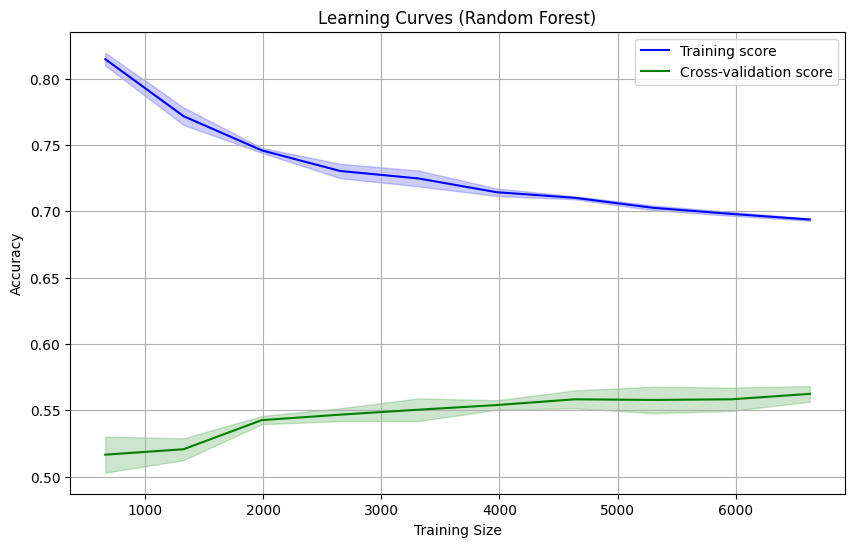

In [58]:
from sklearn.model_selection import learning_curve

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Plot the learning curve
train_sizes, train_scores, val_scores = learning_curve(
    rf_model, X_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Calculate mean and std deviation for train and validation scores
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

train_std = train_scores.std(axis=1)
val_std = val_scores.std(axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.plot(train_sizes, val_mean, label='Cross-validation score', color='green')

# Plot the fill_between for standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='green', alpha=0.2)

plt.title("Learning Curves (Random Forest)")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant to the features to calculate VIF
X_const = add_constant(X_resampled)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif_data)


               feature        VIF
0                const  31.998876
1             category   1.012801
2             app_type   1.087965
3            price_usd   1.063915
4       content_rating   1.026552
5  min_android_version   1.293649
6        size_category   1.301212


In [60]:
# Evaluate the model on the resampled training set
train_accuracy = rf_grid_search.best_estimator_.score(X_resampled, y_resampled)
test_accuracy = rf_grid_search.best_estimator_.score(X_test, y_test)

print(f"Train Accuracy on Resampled Data: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Check cross-validation scores using the resampled data
cv_scores = cross_val_score(rf_grid_search.best_estimator_, X_resampled, y_resampled, cv=5)
print(f"Cross-validation Scores: {np.mean(cv_scores)}")


Train Accuracy on Resampled Data: 0.6706688596491228
Test Accuracy: 0.47393822393822393
Cross-validation Scores: 0.5499451754385964


#### 4.5.3 Support Vector Machine Pipeline
Support Vector Machine (SVM) is effective for classification with clear margins. The parameters C (penalty) and gamma (influence range) adjust complexity and performance.

In [61]:
# Baseline SVM Pipeline
baseline_svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42))
])
baseline_svm_pipeline.fit(X_resampled, y_resampled)
svm_baseline_predictions = baseline_svm_pipeline.predict(X_test)
svm_baseline_predictions_decoded = label_encoder.inverse_transform(svm_baseline_predictions)

y_test_decoded = label_encoder.inverse_transform(y_test)

print("Baseline SVM Report:")
print(classification_report(y_test_decoded, svm_baseline_predictions_decoded, target_names=label_encoder.classes_))



Baseline SVM Report:
              precision    recall  f1-score   support

       Large       0.86      0.45      0.59      1140
      Medium       0.22      0.14      0.17       272
       Small       0.18      0.29      0.22       302
      Varies       0.29      0.65      0.40       358

    accuracy                           0.42      2072
   macro avg       0.39      0.38      0.35      2072
weighted avg       0.58      0.42      0.45      2072



#### 4.5.4 XGBoost Classifier


In [62]:
# Baseline XGBoost Pipeline
baseline_xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optional for consistency
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])
baseline_xgb_pipeline.fit(X_resampled, y_resampled)
xgb_baseline_predictions = baseline_xgb_pipeline.predict(X_test)
xgb_baseline_predictions_decoded = label_encoder.inverse_transform(xgb_baseline_predictions)

y_test_decoded = label_encoder.inverse_transform(y_test)

print("Baseline XGBoost Report:")
print(classification_report(y_test_decoded, xgb_baseline_predictions_decoded, target_names=label_encoder.classes_))

# Tuned XGBoost Pipeline
xgb_param_grid = {
    'xgb__n_estimators': [50, 100, 200],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__max_depth': [3, 6, 10],
    'xgb__subsample': [0.8, 1.0]
}
tuned_xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optional for consistency
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])
xgb_grid_search = GridSearchCV(tuned_xgb_pipeline, param_grid=xgb_param_grid, cv=5, scoring='accuracy')
xgb_grid_search.fit(X_resampled, y_resampled)
xgb_tuned_predictions = xgb_grid_search.best_estimator_.predict(X_test)
xgb_tuned_predictions_decoded = label_encoder.inverse_transform(xgb_tuned_predictions)

y_test_decoded = label_encoder.inverse_transform(y_test)

print("Tuned XGBoost Report:")
print(classification_report(y_test_decoded, xgb_tuned_predictions_decoded, target_names=label_encoder.classes_))

#Cross validate
cross_val(xgb_grid_search.best_estimator_)

Baseline XGBoost Report:
              precision    recall  f1-score   support

       Large       0.81      0.64      0.71      1140
      Medium       0.24      0.31      0.27       272
       Small       0.23      0.27      0.25       302
      Varies       0.36      0.46      0.40       358

    accuracy                           0.51      2072
   macro avg       0.41      0.42      0.41      2072
weighted avg       0.57      0.51      0.53      2072

Tuned XGBoost Report:
              precision    recall  f1-score   support

       Large       0.80      0.61      0.69      1140
      Medium       0.22      0.30      0.25       272
       Small       0.20      0.25      0.22       302
      Varies       0.35      0.43      0.38       358

    accuracy                           0.49      2072
   macro avg       0.39      0.40      0.39      2072
weighted avg       0.56      0.49      0.51      2072

Cross-Validation Scores: [0.49698465 0.53399123 0.58223684 0.56716009 0.57675439]
M

array([0.49698465, 0.53399123, 0.58223684, 0.56716009, 0.57675439])

In [63]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Define a function to calculate and print metrics for both train and test sets
def evaluate_model_performance(model, X_train, y_train, X_test, y_test, label_encoder):
    # Training predictions
    y_train_pred = model.predict(X_train)
    y_train_pred_decoded = label_encoder.inverse_transform(y_train_pred)
    y_train_decoded = label_encoder.inverse_transform(y_train)

    # Testing predictions
    y_test_pred = model.predict(X_test)
    y_test_pred_decoded = label_encoder.inverse_transform(y_test_pred)
    y_test_decoded = label_encoder.inverse_transform(y_test)

    # Metrics for training set
    train_accuracy = accuracy_score(y_train_decoded, y_train_pred_decoded)
    train_f1 = f1_score(y_train_decoded, y_train_pred_decoded, average='macro')

    # Convert labels for multi-class AUC calculation
    lb = LabelBinarizer()
    y_train_binarized = lb.fit_transform(y_train_decoded)
    y_train_pred_binarized = lb.transform(y_train_pred_decoded)
    train_auc = roc_auc_score(y_train_binarized, y_train_pred_binarized, average='macro', multi_class='ovo')

    # Metrics for test set
    test_accuracy = accuracy_score(y_test_decoded, y_test_pred_decoded)
    test_f1 = f1_score(y_test_decoded, y_test_pred_decoded, average='macro')
    y_test_binarized = lb.transform(y_test_decoded)
    y_test_pred_binarized = lb.transform(y_test_pred_decoded)
    test_auc = roc_auc_score(y_test_binarized, y_test_pred_binarized, average='macro', multi_class='ovo')

    # Print results
    print(f"Training Set - Accuracy: {train_accuracy:.4f}, F1 Score: {train_f1:.4f}, AUC: {train_auc:.4f}")
    print(f"Test Set     - Accuracy: {test_accuracy:.4f}, F1 Score: {test_f1:.4f}, AUC: {test_auc:.4f}")

# Baseline Random Forest
print("Baseline Random Forest Model:")
evaluate_model_performance(baseline_rf_pipeline, X_resampled, y_resampled, X_test, y_test, label_encoder)

# Tuned Random Forest
print("\nTuned Random Forest Model:")
evaluate_model_performance(rf_grid_search.best_estimator_, X_resampled, y_resampled, X_test, y_test, label_encoder)

# Baseline XGBoost Model
print("\nBaseline XGBoost Model:")
evaluate_model_performance(baseline_xgb_pipeline, X_resampled, y_resampled, X_test, y_test, label_encoder)

# Tuned XGBoost Model
print("\nTuned XGBoost Model:")
evaluate_model_performance(xgb_grid_search.best_estimator_, X_resampled, y_resampled, X_test, y_test, label_encoder)


Baseline Random Forest Model:
Training Set - Accuracy: 0.6866, F1 Score: 0.6869, AUC: 0.7911
Test Set     - Accuracy: 0.4725, F1 Score: 0.3777, AUC: 0.6060

Tuned Random Forest Model:
Training Set - Accuracy: 0.6707, F1 Score: 0.6712, AUC: 0.7804
Test Set     - Accuracy: 0.4739, F1 Score: 0.3776, AUC: 0.6062

Baseline XGBoost Model:
Training Set - Accuracy: 0.6044, F1 Score: 0.6047, AUC: 0.7363
Test Set     - Accuracy: 0.5106, F1 Score: 0.4082, AUC: 0.6271

Tuned XGBoost Model:
Training Set - Accuracy: 0.6498, F1 Score: 0.6505, AUC: 0.7665
Test Set     - Accuracy: 0.4855, F1 Score: 0.3871, AUC: 0.6123


In [64]:
# Check if the model has high accuracy both on the train and test sets
train_accuracy = xgb_grid_search.best_estimator_.score(X_resampled, y_resampled)
test_accuracy = xgb_grid_search.best_estimator_.score(X_test, y_test)

print(f"Train Accuracy on Resampled Data: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

#check cross-val scores
cv_scores = cross_val_score(xgb_grid_search.best_estimator_, X_resampled, y_resampled, cv=5)
print(f"Cross-validation Scores: {np.mean(cv_scores)}")

Train Accuracy on Resampled Data: 0.649780701754386
Test Accuracy: 0.4855212355212355
Cross-validation Scores: 0.5514254385964913


#### 4.4.5 Neural Network Model (Sequential API)
The neural network model adds complexity and flexibility for non-linear data patterns. The Dense layers and activation functions are tuned for classification with the softmax output layer.

In [65]:
# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_resampled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


train_model = model.fit(X_resampled, y_resampled, epochs=20, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

predictions = model.predict(X_test)
predicted_classes = predictions.argmax(axis=1)

# Map predictions to original class labels

y_test_decoded = label_encoder.inverse_transform(y_test)
predicted_classes_decoded = label_encoder.inverse_transform(predicted_classes)

# Use decoded predicted classes for classification report
print("Classification Report:\n", classification_report(y_test_decoded, predicted_classes_decoded, target_names=label_encoder.classes_))


Epoch 1/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3308 - loss: 1.3522 - val_accuracy: 0.0263 - val_loss: 2.1786
Epoch 2/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4007 - loss: 1.2616 - val_accuracy: 0.0211 - val_loss: 1.6839
Epoch 3/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4015 - loss: 1.2494 - val_accuracy: 0.0151 - val_loss: 2.1738
Epoch 4/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4016 - loss: 1.2323 - val_accuracy: 2.7412e-04 - val_loss: 2.4207
Epoch 5/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4071 - loss: 1.2288 - val_accuracy: 0.0189 - val_loss: 2.1221
Epoch 6/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4089 - loss: 1.2151 - val_accuracy: 0.0154 - val_loss: 2.0529
Epoch 7/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4142 - loss: 1.2143 - val_accuracy: 0.0688 - val_loss: 1.8809
Epoch 8/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4142 - loss: 1.2183 - val_accuracy

In [66]:
#save the nn model
from tensorflow.keras.models import load_model
model.save('app_success_model.keras')

In [67]:
#save the scaler
scaler = StandardScaler()
scaler.fit(X_resampled)
joblib.dump(scaler, 'scaler.joblib')

#download scaler
files.download('scaler.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [68]:
#test if model is saved
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report

# Load the saved model
model = load_model('app_success_model.keras')

# Evaluate the loaded model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy of Loaded Model: {test_accuracy:.2f}")

# Make predictions with the loaded model
predictions = model.predict(X_test)
predicted_classes = predictions.argmax(axis=1)

# Decode predictions to original labels
y_test_decoded = label_encoder.inverse_transform(y_test)
predicted_classes_decoded = label_encoder.inverse_transform(predicted_classes)

# Print the classification report
print("Classification Report for Loaded Model:\n", classification_report(y_test_decoded, predicted_classes_decoded, target_names=label_encoder.classes_))



65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3978 - loss: 1.2556
Test Accuracy of Loaded Model: 0.41
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

       Large       0.76      0.54      0.63      1140
      Medium       0.18      0.72      0.29       272
       Small       0.19      0.09      0.12       302
      Varies       0.48      0.03      0.05       358

    accuracy                           0.41      2072
   macro avg       0.40      0.34      0.27      2072
weighted avg       0.55      0.41      0.41      2072



#### 4.5.6 Evaluation on Test Set
After identifying the best parameters, evaluate each model with classification metrics.

In [73]:
# Predict and evaluate each model
models = {
    'Logistic Regression': logreg_grid_search.best_estimator_,
    'Random Forest': rf_grid_search.best_estimator_,
    'SVM': baseline_svm_pipeline,
    'XGBoost': xgb_grid_search.best_estimator_,
    'Neural Network': model
}

# Assuming y_test and predictions are encoded labels (numerical values)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Loop through each model for evaluation
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")

    if model_name == 'Neural Network':
        # For Neural Network: Convert predictions to class labels first
        predicted_classes = np.argmax(model.predict(X_test), axis=1)
    else:
        predicted_classes = model.predict(X_test)

    # Decode predictions back to original class labels
    predicted_classes_decoded = label_encoder.inverse_transform(predicted_classes)

    # Print classification report for each model
    print(classification_report(y_test_decoded, predicted_classes_decoded, target_names=label_encoder.classes_))
    print("\n")


Evaluating Logistic Regression...
              precision    recall  f1-score   support

       Large       0.70      0.46      0.55      1140
      Medium       0.18      0.08      0.11       272
       Small       0.13      0.23      0.16       302
      Varies       0.26      0.49      0.34       358

    accuracy                           0.38      2072
   macro avg       0.32      0.31      0.29      2072
weighted avg       0.47      0.38      0.40      2072



Evaluating Random Forest...
              precision    recall  f1-score   support

       Large       0.80      0.59      0.68      1140
      Medium       0.21      0.30      0.24       272
       Small       0.19      0.23      0.21       302
      Varies       0.34      0.43      0.38       358

    accuracy                           0.47      2072
   macro avg       0.38      0.39      0.38      2072
weighted avg       0.55      0.47      0.50      2072



Evaluating SVM...
              precision    recall  f1-score   

In [70]:
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_resampled.shape[1],)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(len(label_encoder.classes_), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create KerasClassifier wrapper
keras_model = KerasClassifier(model=create_model, epochs=20, batch_size=32, verbose=0)

# Perform cross-validation
from sklearn.model_selection import cross_val_score
def cross_val(model):
    cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5)
    print("Cross-Validation Scores:", cv_scores)
    print("Mean CV Score:", np.mean(cv_scores))
    return cv_scores

cross_val(keras_model)

# Train the final model on the entire resampled data if desired
final_model = create_model()
final_model.fit(X_resampled, y_resampled, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the final model on the test set
test_loss, test_accuracy = final_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

predictions = final_model.predict(X_test)
predicted_classes = predictions.argmax(axis=1)

# Map predictions to original class labels
y_test_decoded = label_encoder.inverse_transform(y_test)
predicted_classes_decoded = label_encoder.inverse_transform(predicted_classes)

# Use decoded predicted classes for classification report
print("Classification Report:\n", classification_report(y_test_decoded, predicted_classes_decoded, target_names=label_encoder.classes_))


Cross-Validation Scores: [0.38322368 0.4002193  0.39747807 0.40131579 0.41365132]
Mean CV Score: 0.39917763157894737
Epoch 1/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3490 - loss: 1.3660 - val_accuracy: 0.0222 - val_loss: 2.0593
Epoch 2/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4019 - loss: 1.2485 - val_accuracy: 0.0071 - val_loss: 1.9568
Epoch 3/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4087 - loss: 1.2421 - val_accuracy: 8.2237e-04 - val_loss: 2.0357
Epoch 4/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4134 - loss: 1.2288 - val_accuracy: 0.0019 - val_loss: 2.0047
Epoch 5/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4091 - loss: 1.2190 - val_accuracy: 0.0038 - val_loss: 2.0306
Epoch 6/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4103 - loss: 1.2184 - val_accuracy: 0.0110 - val_loss: 2.0689
Epoch 7/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4170 - loss: 1.2098 - val_accuracy: 0.0066 - 

In [71]:
from google.colab import files

# Download the model
files.download('app_success_model.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [72]:
# Download the encoder

files.download(encoder_filename)

files.download('target_encoder.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>